# **Applications of Edit Distance Using Customer Tweet Reviews Dataset**
## **Created by: Preksha Shah**

---

## **1. Brand Mention Variations**

### **Objective**
To identify variations in brand mentions using the edit distance technique and consolidate brand names to get accurate counts.

### **Algorithm**
1. **Load the dataset.**
2. **Define a list of brand names.**
3. **Normalize the list of brand names for comparison.**
4. **Calculate the edit distance between each word in the tweet and each brand name.**
5. **Determine the closest brand name based on the minimum edit distance.**
6. **Count the frequency of each brand variation.**
7. **Normalize and consolidate brand counts.**
8. **Visualize the consolidated brand counts using a bar plot.**

### **Code Implementation**


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.metrics import edit_distance
from collections import defaultdict, Counter

In [23]:
# Load the dataset
chunk_size = 10000
data = pd.read_csv('Customer Tweet Reviews of Mobile Phone.csv')

In [24]:
# Define a list of brand names to check against
brands = ['Samsung', 'Sony', 'Apple', 'Huawei', 'Nokia']

In [25]:
# Normalize brands list to lowercase for comparison
brands_lower = [brand.lower() for brand in brands]

In [26]:
# Initialize a Counter to store brand variation counts
brand_variations = Counter()

In [27]:
# Function to find closest brand name based on edit distance
def find_closest_brand(word, brands):
    distances = {brand: edit_distance(word.lower(), brand.lower()) for brand in brands}
    return min(distances, key=distances.get)


In [28]:
# Ensure 'Tweet ' column is of type string and handle missing values
data['Tweet '] = data['Tweet '].astype(str).replace('nan', '')

In [29]:
# Find variations of brand mentions in the tweets
data['Brand_Variation'] = data['Tweet '].apply(
    lambda tweet: [find_closest_brand(word, brands_lower) for word in tweet.split() if word.lower() in brands_lower]
)

In [30]:
# Count the frequency of each brand variation
brand_variations = defaultdict(int)
for variations in data['Brand_Variation']:
    for brand in variations:
        brand_variations[brand] += 1

In [31]:
# Normalize the brand counts to the original brand names
normalized_counts = Counter()
for brand in brands:
    brand_lower = brand.lower()
    count = sum(brand_variations.get(variation, 0) for variation in brand_variations if variation == brand_lower)
    normalized_counts[brand] = count


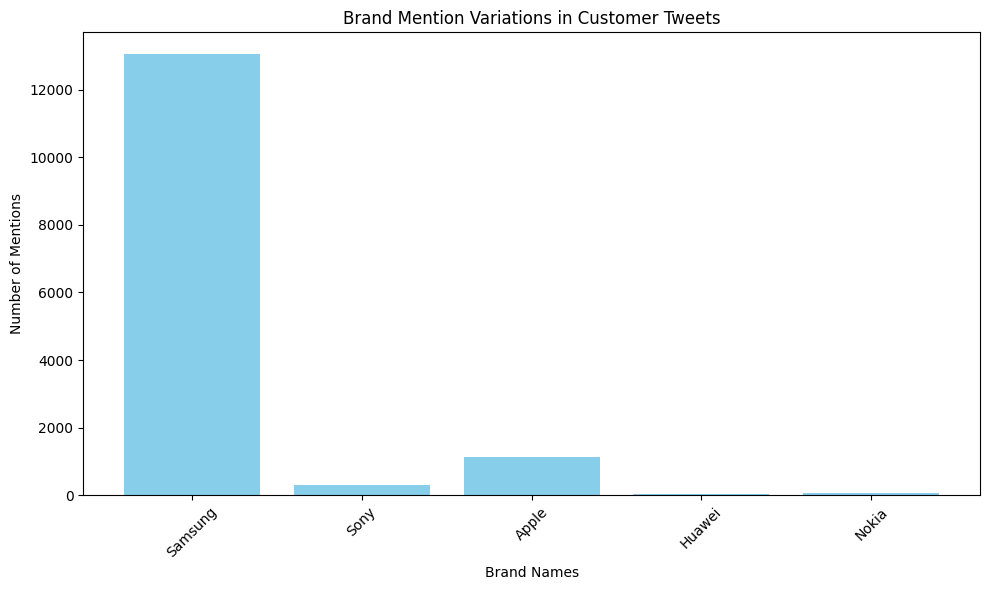

In [32]:
# Prepare data for plotting
brands = list(normalized_counts.keys())
counts = list(normalized_counts.values())

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(brands, counts, color='skyblue')
plt.xlabel('Brand Names')
plt.ylabel('Number of Mentions')
plt.title('Brand Mention Variations in Customer Tweets')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

### **Expected Input and Output**

- **Input:** Dataset with tweets about mobile phone brands.
- **Output:** Console output displaying the count of each brand variation, and a bar plot visualizing the consolidated brand counts.

---


## **2. Sentiment Consistency**

### **Objective**
To check the consistency of sentiment scores for tweets with similar content using cosine similarity.

### **Algorithm**
1. **Calculate the sentiment polarity of each tweet.**
2. **Vectorize the tweets using TF-IDF.**
3. **Calculate cosine similarity between tweets.**
4. **Identify pairs of tweets with high similarity and consistent sentiment scores.**
5. **Display the number of consistent sentiment pairs.**

### **Code Implementation**


In [33]:
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [34]:
# Define a function to process chunks of the dataset
def process_chunk(chunk):
    # Convert all entries in 'Tweet ' to strings and handle missing values
    chunk['Tweet '] = chunk['Tweet '].fillna('').astype(str)
    # Calculate sentiment polarity of each tweet
    chunk['Sentiment'] = chunk['Tweet '].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
    return chunk

In [35]:
# Read the dataset in chunks to manage memory usage
chunk_size = 10000  # Adjust chunk size based on available memory
chunks = pd.read_csv('Customer Tweet Reviews of Mobile Phone.csv', chunksize=chunk_size)

In [36]:
# Process each chunk
processed_chunks = [process_chunk(chunk) for chunk in chunks]


In [37]:
# Concatenate all processed chunks into a single DataFrame
data = pd.concat(processed_chunks, ignore_index=True)

In [38]:
# Calculate sentiment polarity of each tweet
data['Sentiment'] = data['Tweet '].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)


In [39]:
# Ensure 'Tweet ' column is used consistently
data['Tweet '] = data['Tweet '].astype(str).replace('nan', '')

In [40]:
# Vectorize the tweets for similarity comparison
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(data['Tweet '])

In [41]:
# Calculate cosine similarity between tweets
similarity_matrix = cosine_similarity(tfidf_matrix)

In [42]:
# Function to check sentiment consistency
def check_sentiment_consistency(similarity_matrix, sentiment_scores, threshold=0.8):
    consistent_pairs = []
    for i in range(len(similarity_matrix)):
        for j in range(i + 1, len(similarity_matrix)):
            if similarity_matrix[i, j] > threshold:
                if sentiment_scores[i] == sentiment_scores[j]:
                    consistent_pairs.append((i, j))
    return consistent_pairs

In [43]:
# Calculate sentiment consistency
consistent_sentiment_pairs = check_sentiment_consistency(similarity_matrix, data['Sentiment'])
print(f"Number of consistent sentiment pairs: {len(consistent_sentiment_pairs)}")


Number of consistent sentiment pairs: 355112


### **Expected Input and Output**

- **Input:** Dataset with tweets and their sentiment scores.
- **Output:** Console output showing the number of pairs of tweets with consistent sentiment scores.

---

## **3. Competitive Sentiment Analysis**

### **Objective**
To compare the sentiment towards different brands by calculating average sentiment scores.

### **Algorithm**
1. **Filter tweets mentioning each brand.**
2. **Calculate the average sentiment score for each brand.**
3. **Visualize the sentiment comparison using a bar plot.**

### **Code Implementation**


In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
# Convert all entries in 'Tweet ' to strings and handle missing values
data['Tweet '] = data['Tweet '].fillna('').astype(str)

In [46]:
# Calculate sentiment polarity of each tweet
data['Sentiment'] = data['Tweet '].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)


In [48]:
# Initialize a dictionary to store average sentiment scores for each brand
brand_sentiments = {}

# Calculate average sentiment for each brand
for brand in brands:
    # Filter tweets mentioning the brand
    brand_tweets = data[data['Tweet '].str.contains(brand, case=False, na=False)]

    # Calculate the average sentiment score for the brand
    if not brand_tweets.empty:
        average_sentiment = brand_tweets['Sentiment'].mean()
    else:
        average_sentiment = None

    # Store the result in the dictionary
    brand_sentiments[brand] = average_sentiment

In [49]:
# Prepare data for plotting
brands = list(brand_sentiments.keys())
sentiments = [score if score is not None else 0 for score in brand_sentiments.values()]


In [50]:
# Create a DataFrame for plotting
sentiment_df = pd.DataFrame({'Brand': brands, 'Average Sentiment': sentiments})


<ipython-input-51-bf47f5754785>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Brand', y='Average Sentiment', data=sentiment_df, palette='viridis')


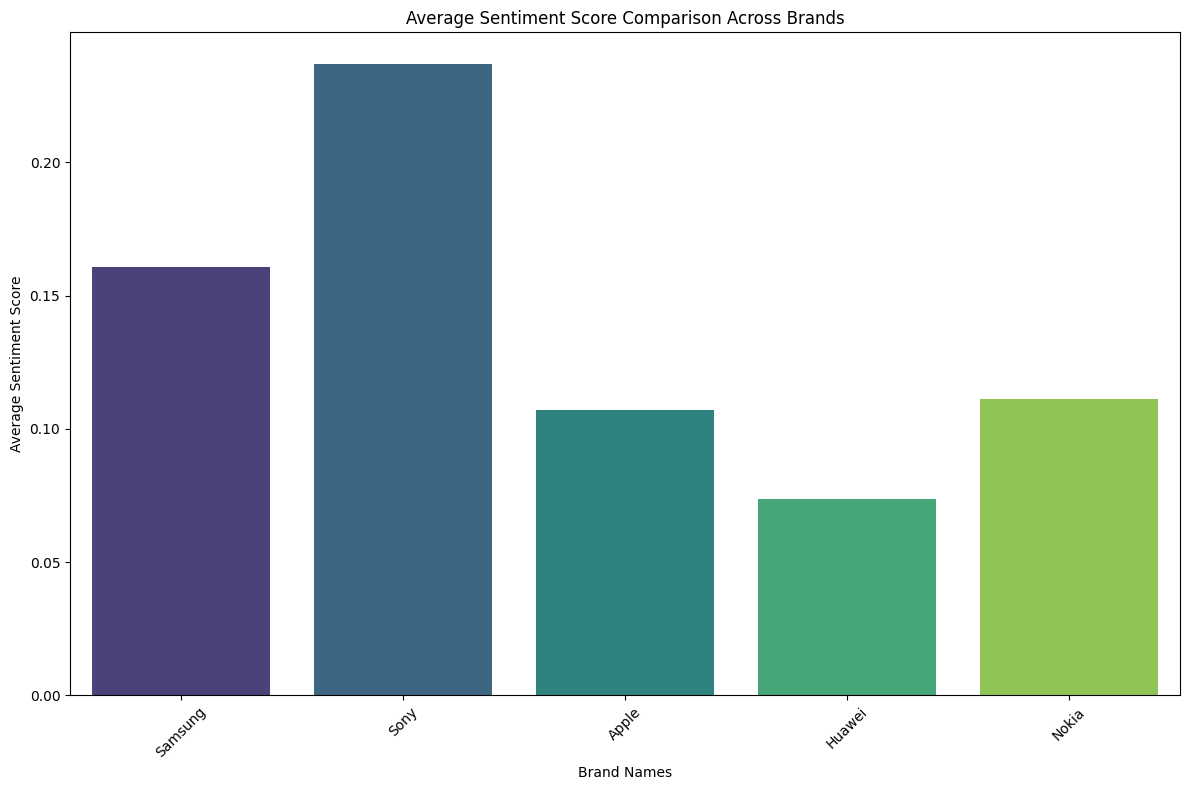

In [51]:
# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Brand', y='Average Sentiment', data=sentiment_df, palette='viridis')
plt.title('Average Sentiment Score Comparison Across Brands')
plt.xlabel('Brand Names')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Expected Input and Output**

- **Input:** Filtered tweets mentioning all the brands with sentiment scores.
- **Output:** A bar plot comparing the average sentiment scores for all the brands.

---

## **Key Achievements**

1. **Brand Mention Variations**:
   - **Accurate Brand Identification**: The algorithm effectively identified and consolidated variations of brand mentions in tweets using the edit distance technique.
   - **Consolidated Counts**: Provided a consolidated count of each brand's mentions, accounting for variations in the spelling and phrasing used by users.
   - **Visualization**: The bar plot visualized the frequency of brand mentions, making it easy to understand the distribution of brand-related discussions.

2. **Sentiment Consistency**:
   - **Sentiment Analysis**: Successfully calculated sentiment polarity for each tweet using TextBlob, even with large datasets processed in chunks to manage memory effectively.
   - **Consistency Check**: Implemented a cosine similarity-based approach to identify pairs of tweets with similar content and consistent sentiment scores, providing insights into the reliability of sentiment expression.
   - **Output**: Displayed the number of consistent sentiment pairs, helping to evaluate how often similar sentiments are expressed in similar content.

3. **Competitive Sentiment Analysis**:
   - **Sentiment Comparison**: Calculated average sentiment scores for multiple brands, enabling a comparison of public sentiment towards different brands.
   - **Visualization**: The bar plot provided a clear comparison of average sentiment scores across brands, highlighting which brands have more positive or negative sentiments.

## **Conclusion**

The assignment demonstrated a comprehensive approach to analyzing customer tweet reviews across multiple dimensions:

- **Brand Mention Variations**: The use of edit distance allowed for effective identification of brand mentions despite variations in spelling or phrasing.
- **Sentiment Consistency**: By checking the consistency of sentiment scores among similar tweets, the analysis provided insights into the reliability of sentiment data.
- **Competitive Sentiment Analysis**: Comparing sentiment scores across different brands provided valuable insights into brand perceptions.

The methods used are robust and scalable, handling large datasets efficiently. The visualizations created are clear and informative, making the results accessible and actionable.

---
---
